In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")

# Print out variables
print(df.head())

print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


In [38]:
# creating a data frame to hold our features.
features = pd.get_dummies(df['cntry'])

features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)


### Nordic feature creation
This feature was created to establish a basis for the region of origin

In [39]:
features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

### Elderly creation
this feature was created to establish age difference between the elderly

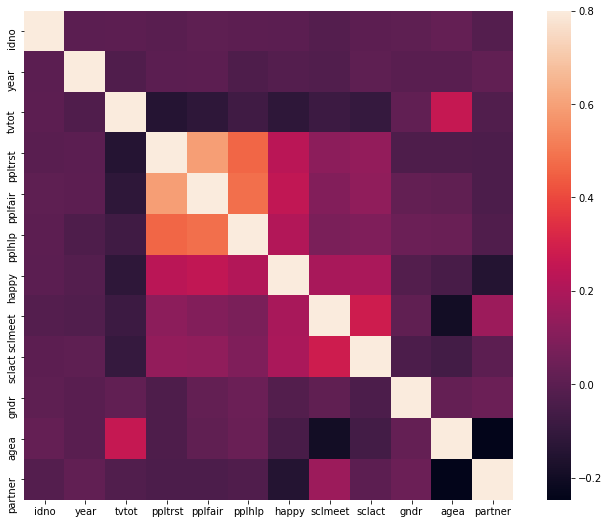

In [21]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [22]:
means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

### correlatoin between trust fair and help
This was made to reduce redundency since all these values were strongly correlated

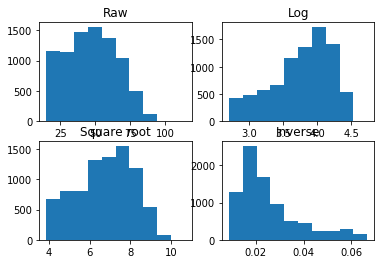

In [23]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['agea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['agea'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['agea'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['agea'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_age'] = np.log(df['agea'])

### Normalizing age
This was created to help normalize age for futher use

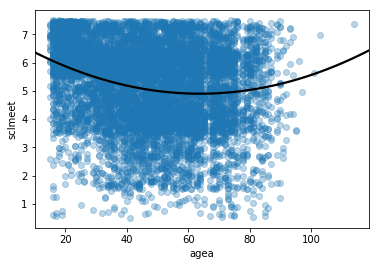

In [24]:
sns.regplot(
    df['agea'],
    y=df['sclmeet'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['age_squared'] = df['agea'] * df['agea']

### Age squared
Created a more linear relationship with age

In [26]:
features['Sadness'] = max(df['happy']) - df['happy']

### Sadness feature
a different perspective on the existing happiness variable

In [28]:
features['LiveWithPartner'] = np.where(df['partner'] == 1, 1, 0)

### Partner recode feature
switch parnter variable to be truly binary

In [31]:
features['Sad_Partner'] = features['Sadness'] * features['LiveWithPartner']

### Sad partner
notes saddness in individuals that have a partner living with them

In [34]:
features['Tvtot']=df['tvtot']

### Tv total feature
Noted for further features

In [35]:
features['TvPartner']=features['Tvtot']*features['LiveWithPartner']

### TV Partner
feature describes the tv watch time of those that live with a partner

In [36]:
features

,CH,CZ,DE,ES,NO,SE,Nordic,Adult_65plus,trust_fair_help,log_age,age_squared,Sadness,LiveWithPartner,Sad_Partner,Tvtot,TvPartner
0,1,0,0,0,0,0,0,0,0.194142,4.094345,3600.0,2.0,1,2.0,3.0,3.0
1,1,0,0,0,0,0,0,0,0.023087,4.077537,3481.0,1.0,1,1.0,6.0,6.0
2,1,0,0,0,0,0,0,0,1.087377,3.178054,576.0,3.0,0,0.0,1.0,0.0
3,1,0,0,0,0,0,0,0,0.322544,4.158883,4096.0,0.0,1,0.0,4.0,4.0
4,1,0,0,0,0,0,0,0,0.172316,4.007333,3025.0,2.0,1,2.0,5.0,5.0
5,1,0,0,0,0,0,0,0,-0.134416,NaN,NaN,2.0,0,0.0,4.0,0.0
6,1,0,0,0,0,0,0,1,-1.496166,4.330733,5776.0,10.0,1,10.0,3.0,3.0
7,1,0,0,0,0,0,0,0,-0.745883,3.401197,900.0,0.0,1,0.0,2.0,2.0
8,1,0,0,0,0,0,0,1,1.087377,4.430817,7056.0,1.0,0,0.0,2.0,0.0
9,1,0,0,0,0,0,0,0,-0.135557,4.127134,3844.0,3.0,1,3.0,4.0,4.0
